In [2]:
import pandas as pd
import numpy as np

### Importing data

In [3]:
x = pd.read_csv('beer_data_trans_weight.csv')

In [4]:
x

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,5.3,25,50,3.12,7.67,2.16,11.27,17.75,7.91,0.0,7.91,13.67,1.92,26.62
1,7.2,25,50,3.47,16.47,5.20,9.54,15.90,4.62,0.0,6.94,10.12,3.47,24.28
2,5.0,25,50,4.95,13.07,2.12,14.84,15.19,3.89,0.0,3.53,19.08,1.41,21.91
3,8.5,25,50,2.65,11.22,6.33,9.59,20.61,3.67,0.2,10.00,8.16,3.27,24.29
4,5.3,25,50,3.59,11.79,1.71,10.77,20.51,2.39,0.0,3.25,6.15,2.56,37.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5348,6.8,35,50,2.06,11.34,6.19,4.90,13.40,5.41,0.0,6.70,5.41,24.74,19.85
5349,6.9,35,50,3.94,13.06,1.61,10.38,15.56,4.11,0.0,8.59,16.28,7.87,18.60
5350,7.5,35,50,1.90,6.21,8.62,12.07,12.41,10.17,0.0,13.97,18.97,3.10,12.59
5351,8.0,35,50,1.23,13.11,6.15,11.68,15.98,3.07,0.2,5.74,11.68,4.71,26.43


In [5]:
bier = x.copy()

In [5]:
# removing label
#del x['lebal']
#x

In [6]:
# removing ABV & IBU and redefining as bier
bier = x.iloc[:,3:]
bier

,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,3.12,7.67,2.16,11.27,17.75,7.91,0.0,7.91,13.67,1.92,26.62
1,3.47,16.47,5.20,9.54,15.90,4.62,0.0,6.94,10.12,3.47,24.28
2,4.95,13.07,2.12,14.84,15.19,3.89,0.0,3.53,19.08,1.41,21.91
3,2.65,11.22,6.33,9.59,20.61,3.67,0.2,10.00,8.16,3.27,24.29
4,3.59,11.79,1.71,10.77,20.51,2.39,0.0,3.25,6.15,2.56,37.26
...,...,...,...,...,...,...,...,...,...,...,...
5348,2.06,11.34,6.19,4.90,13.40,5.41,0.0,6.70,5.41,24.74,19.85
5349,3.94,13.06,1.61,10.38,15.56,4.11,0.0,8.59,16.28,7.87,18.60
5350,1.90,6.21,8.62,12.07,12.41,10.17,0.0,13.97,18.97,3.10,12.59
5351,1.23,13.11,6.15,11.68,15.98,3.07,0.2,5.74,11.68,4.71,26.43


### How many should I classify these?

#### Elbow Method

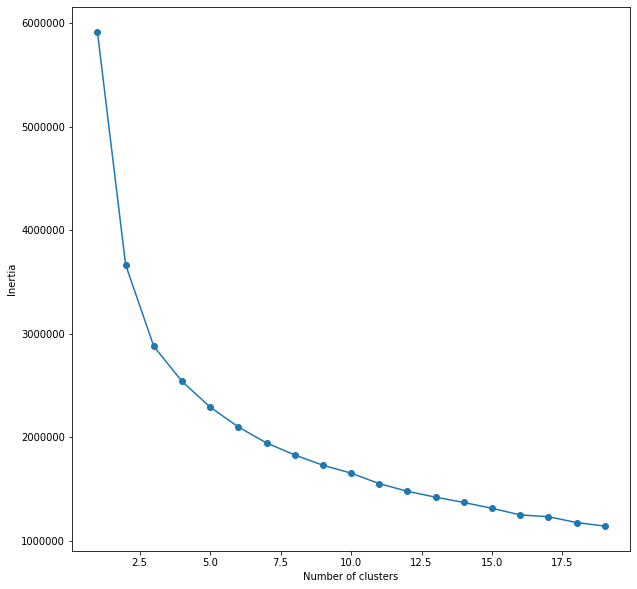

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia =[]
for i in range(1,20):
    kmeans_plus = KMeans(n_clusters=i, init='k-means++')
    kmeans_plus.fit(bier)
    inertia.append(kmeans_plus.inertia_)
    
plt.figure(figsize=(10,10))
plt.plot(range(1,20), inertia, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.show()

#### Silhoutte Score

In [8]:
from sklearn.metrics import silhouette_score

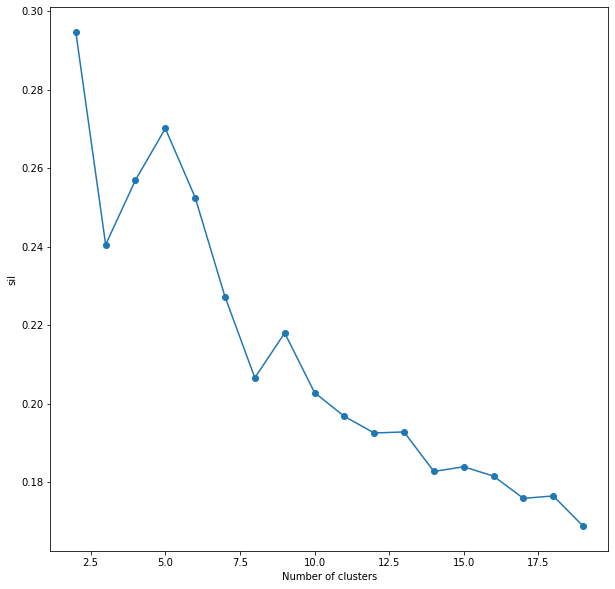

In [9]:
sil = []
for i in range(2,20):
    kmeans_plus = KMeans(n_clusters=i)
    kmeans_plus.fit(bier)
    sil.append(silhouette_score(bier,kmeans_plus.labels_))
    
plt.figure(figsize=(10,10))
plt.plot(range(2,20), sil, marker ='o')
plt.xlabel('Number of clusters')
plt.ylabel('sil')
plt.show()

Optimal silhouette score: 5

In [10]:
sil

[0.29471201260818447,
 0.2405024548252096,
 0.25697236755321,
 0.2701128004840482,
 0.2525208401405594,
 0.22722392481351755,
 0.20657882952096682,
 0.21801008530314184,
 0.20282308020038844,
 0.1967522323670339,
 0.19252299337812975,
 0.19278903615924728,
 0.1827232812855953,
 0.18392325466445536,
 0.18153426381565238,
 0.17586463783272496,
 0.17648908702417496,
 0.16880298213578165]

### KMeans

In [11]:
from sklearn.cluster import KMeans

#### K = 5

In [41]:
model = KMeans(n_clusters=5)

In [42]:
model.fit(bier)

KMeans(n_clusters=5)

In [43]:
del bier['label']

In [44]:
bier['label'] = model.labels_

In [45]:
bier

,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,label
0,3.12,7.67,2.16,11.27,17.75,7.91,0.0,7.91,13.67,1.92,26.62,3
1,3.47,16.47,5.20,9.54,15.90,4.62,0.0,6.94,10.12,3.47,24.28,3
2,4.95,13.07,2.12,14.84,15.19,3.89,0.0,3.53,19.08,1.41,21.91,0
3,2.65,11.22,6.33,9.59,20.61,3.67,0.2,10.00,8.16,3.27,24.29,1
4,3.59,11.79,1.71,10.77,20.51,2.39,0.0,3.25,6.15,2.56,37.26,3
...,...,...,...,...,...,...,...,...,...,...,...,...
5348,2.06,11.34,6.19,4.90,13.40,5.41,0.0,6.70,5.41,24.74,19.85,4
5349,3.94,13.06,1.61,10.38,15.56,4.11,0.0,8.59,16.28,7.87,18.60,0
5350,1.90,6.21,8.62,12.07,12.41,10.17,0.0,13.97,18.97,3.10,12.59,0
5351,1.23,13.11,6.15,11.68,15.98,3.07,0.2,5.74,11.68,4.71,26.43,3


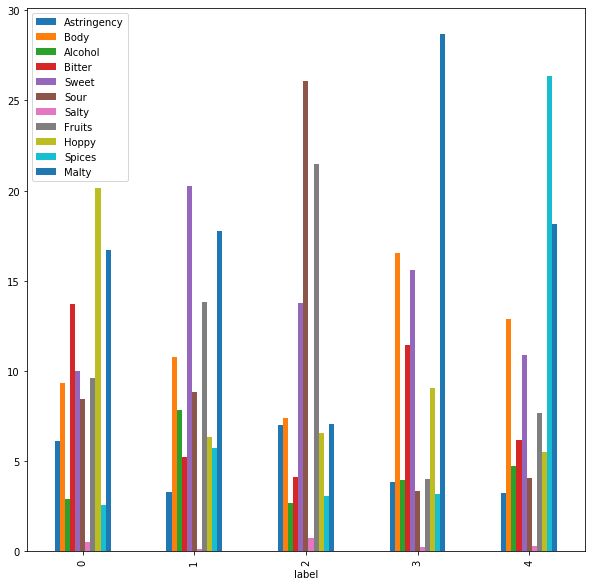

In [46]:
bier_label = bier.groupby('label').mean()
bier_label.plot.bar(figsize=(10,10))

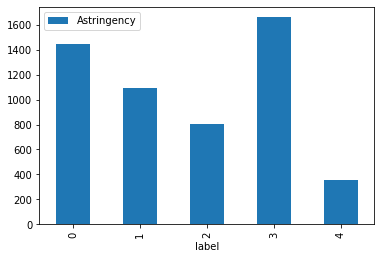

In [47]:
# Visualise how many items are in each label.
freq = bier.groupby('label').count().iloc[:,0].copy()
freq = pd.DataFrame(freq).rename(columns={0:'Counts'})
freq.plot.bar()

### Analysis using DicisionTree

In [319]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [320]:
X = bier.drop('label',axis=1)
y = bier['label']

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [322]:
model = DecisionTreeClassifier()

In [323]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

#### Finding the best MaxDepth

In [324]:
for i in range(2,31):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print("max_depth =",i," : ",round(accuracy_score(y_test, pred),4))

max_depth = 2  :  0.6905
max_depth = 3  :  0.8107
max_depth = 4  :  0.868
max_depth = 5  :  0.8742
max_depth = 6  :  0.8804
max_depth = 7  :  0.8885
max_depth = 8  :  0.9041
max_depth = 9  :  0.9091
max_depth = 10  :  0.9072
max_depth = 11  :  0.9091
max_depth = 12  :  0.9116
max_depth = 13  :  0.9085
max_depth = 14  :  0.906
max_depth = 15  :  0.9066
max_depth = 16  :  0.9097
max_depth = 17  :  0.9134
max_depth = 18  :  0.9072
max_depth = 19  :  0.9085
max_depth = 20  :  0.9103
max_depth = 21  :  0.9122
max_depth = 22  :  0.9066
max_depth = 23  :  0.9116
max_depth = 24  :  0.9072
max_depth = 25  :  0.9016
max_depth = 26  :  0.9029
max_depth = 27  :  0.9047
max_depth = 28  :  0.9047
max_depth = 29  :  0.906
max_depth = 30  :  0.906


max_depth = 15  :  0.9147


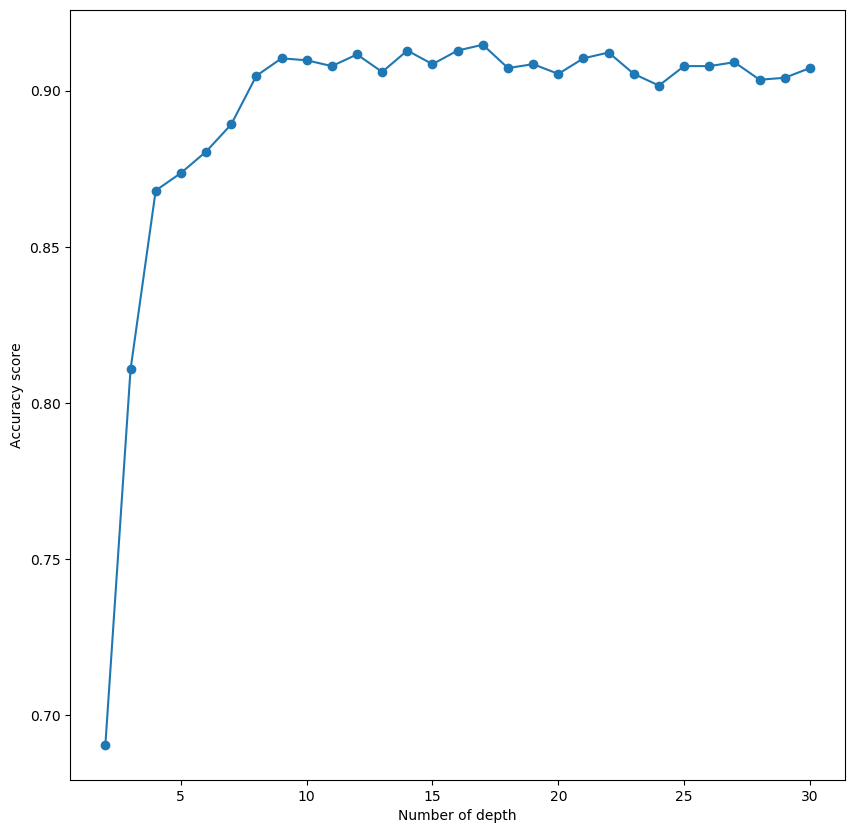

In [325]:
accuracy = []
for i in range(2,31):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred))
    
print("max_depth =",accuracy.index(max(accuracy)), " : ",round(max(accuracy),4))

plt.figure(figsize=(10,10))
plt.plot(range(2,31), accuracy, marker ='o')
plt.xlabel('Number of depth')
plt.ylabel('Accuracy score')
plt.show()

In [335]:
model = DecisionTreeClassifier(max_depth=15)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15)

#### Prediction

In [336]:
pred = model.predict(X_test)

In [337]:
pred

array([1, 3, 3, ..., 0, 4, 2])

In [338]:
y_test

1578    1
3469    3
3544    3
4203    0
119     2
       ..
2015    1
3194    1
913     0
3555    4
794     2
Name: label, Length: 1606, dtype: int32

#### Evaluation

In [339]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [340]:
accuracy_score(y_test, pred)

0.9066002490660025

[Text(2266.7732860648607, 2237.8125, 'Hoppy <= 15.14\n0.764\n3747\n[575, 993, 763, 1161, 255]'),
 Text(1637.2151854498013, 2093.4375, 'Malty <= 23.525\n0.722\n2707\n[546, 107, 761, 1042, 251]'),
 Text(1114.0986114562625, 1949.0625, 'Sour <= 15.635\n0.695\n1614\n[545, 88, 658, 116, 207]'),
 Text(849.0284853379721, 1804.6875, 'Spices <= 16.55\n0.61\n1077\n[53, 81, 623, 116, 204]'),
 Text(631.8541873757455, 1660.3125, 'Bitter <= 8.61\n0.47\n877\n[53, 81, 620, 116, 7]'),
 Text(365.44793737574554, 1515.9375, 'Astringency <= 6.395\n0.205\n615\n[25, 18, 547, 20, 5]'),
 Text(264.0469681908549, 1371.5625, 'Body <= 17.7\n0.122\n550\n[15, 4, 515, 13, 3]'),
 Text(219.94284294234592, 1227.1875, 'Fruits <= 29.04\n0.085\n521\n[15, 4, 498, 2, 2]'),
 Text(168.7127236580517, 1082.8125, 'Sour <= 14.19\n0.065\n512\n[9, 4, 495, 2, 2]'),
 Text(103.23061630218687, 938.4375, 'Hoppy <= 13.795\n0.033\n477\n[1, 3, 469, 2, 2]'),
 Text(58.54870775347913, 794.0625, 'Sour <= 0.465\n0.017\n467\n[1, 0, 463, 1, 2]'),
 

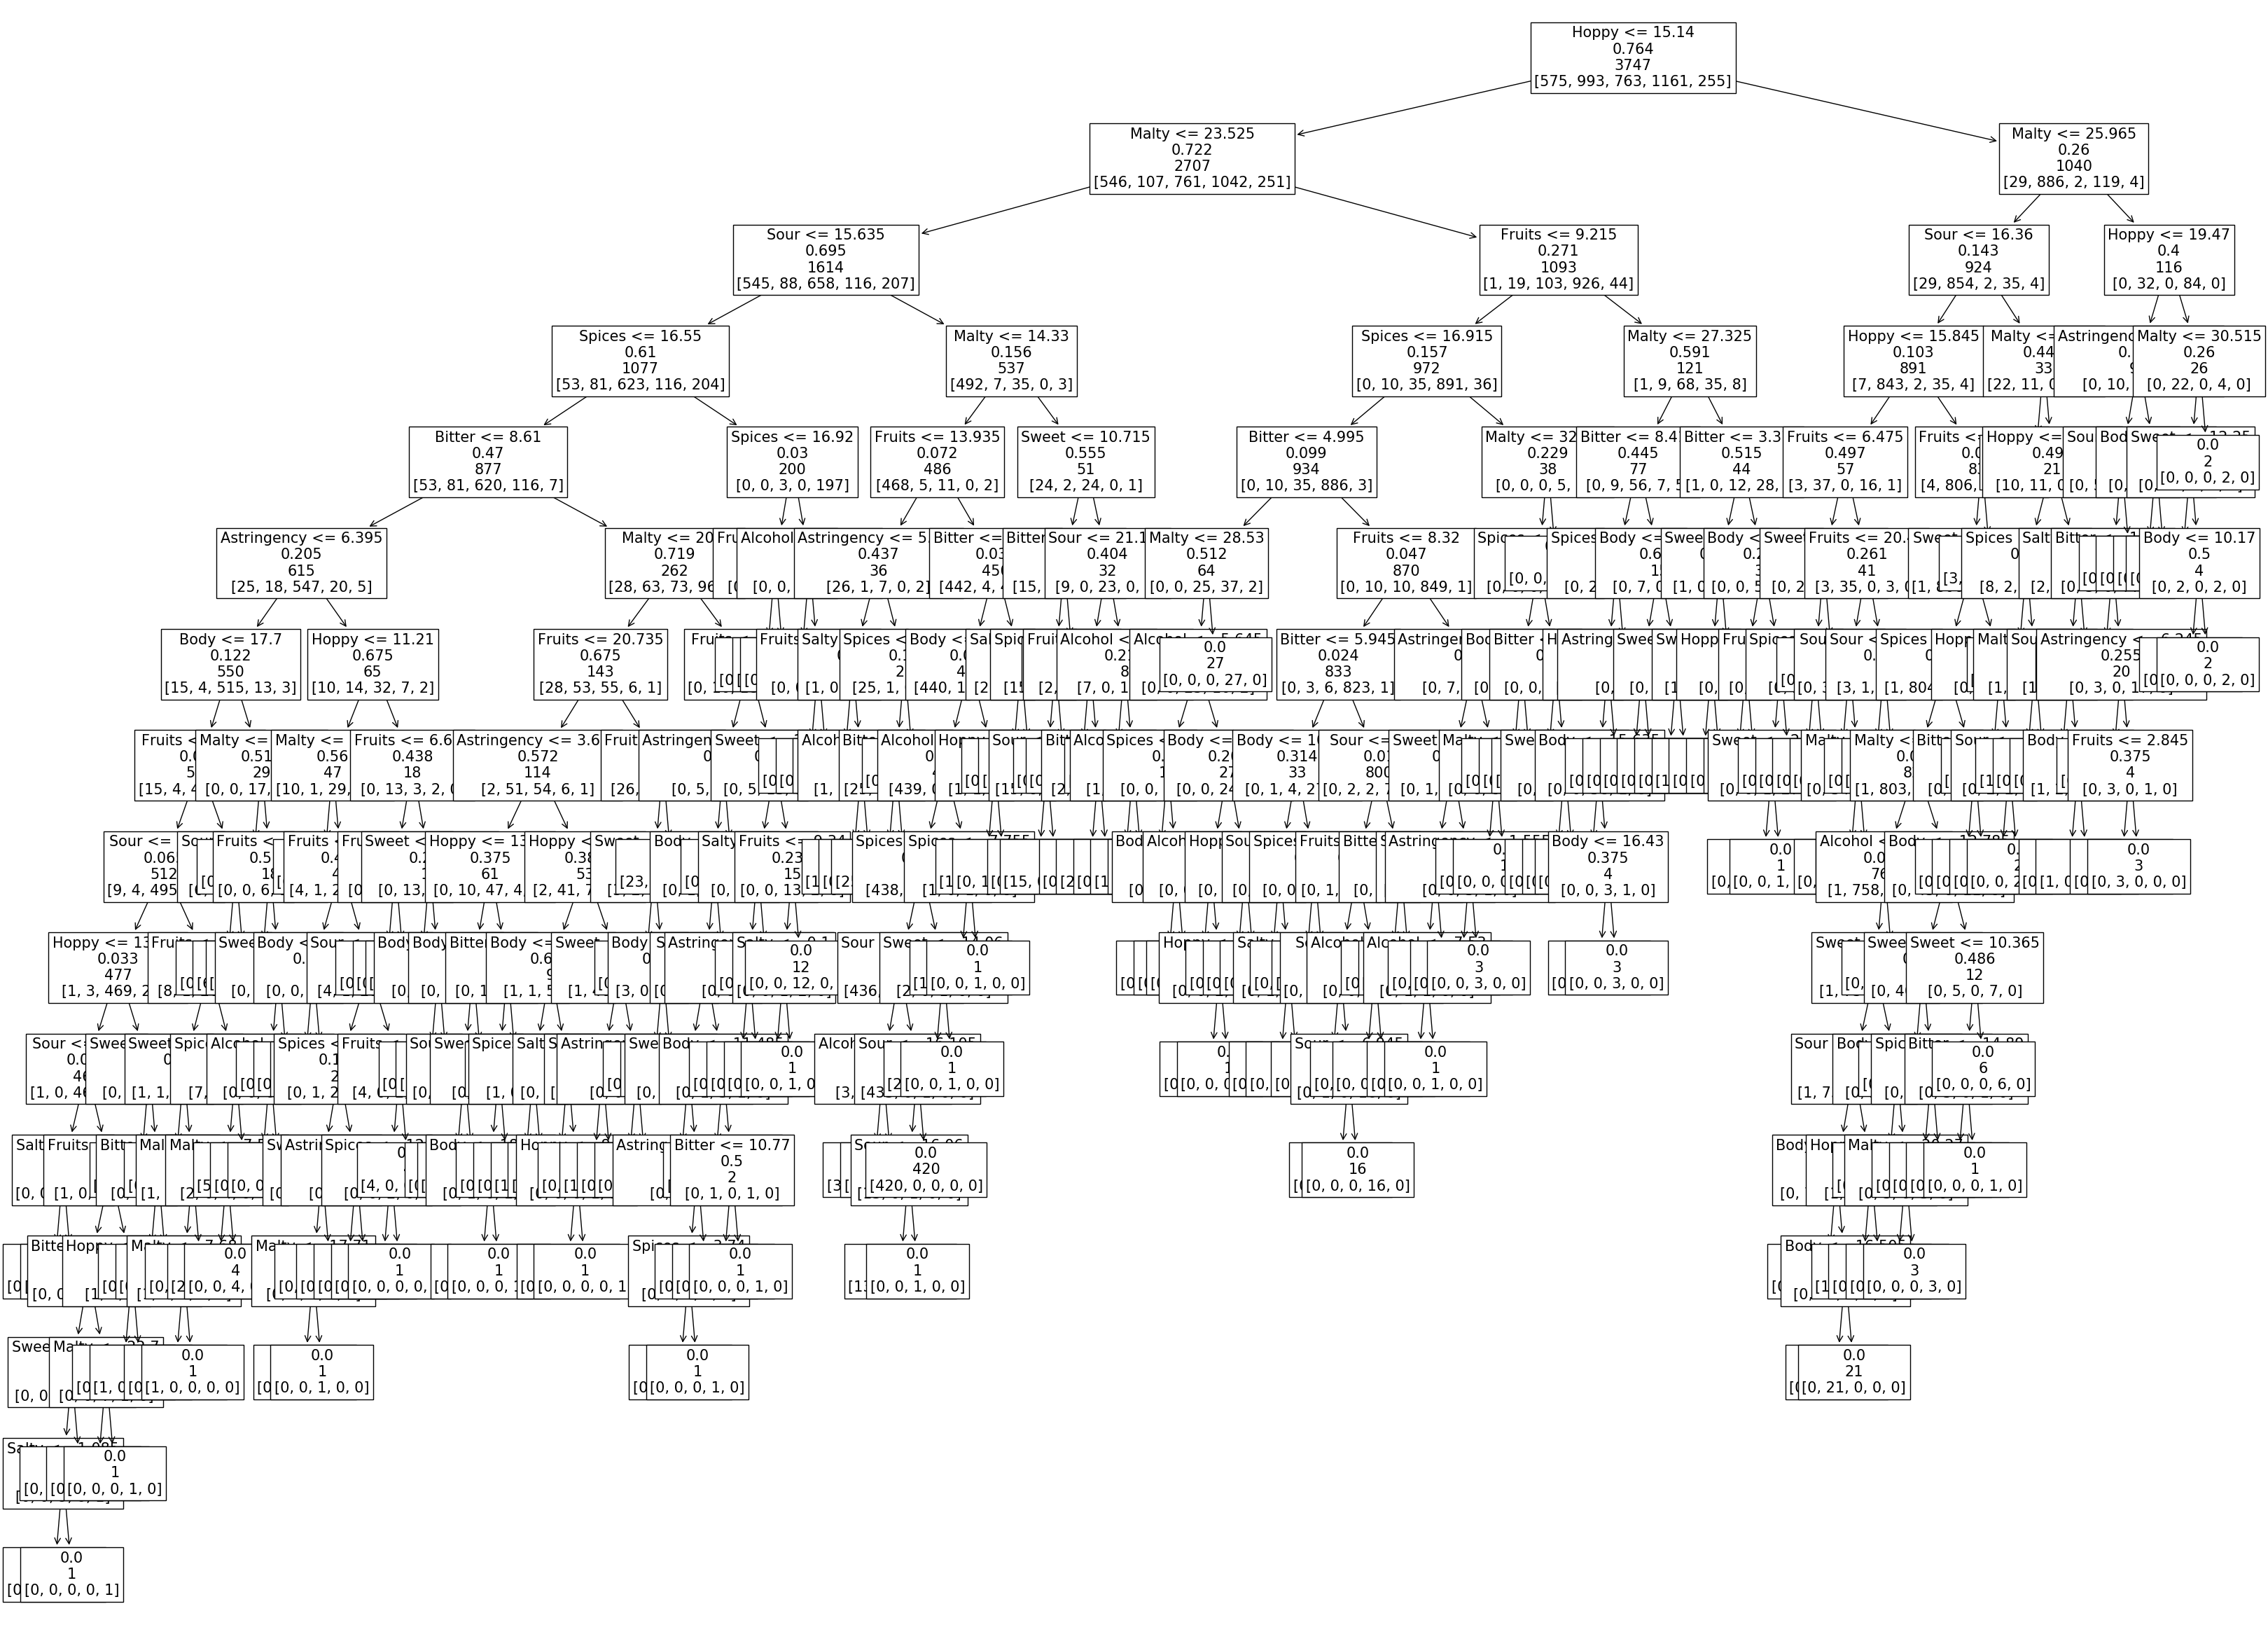

In [341]:
plt.figure(figsize=(40,30))
plt.style.use('default')
plot_tree(model, feature_names=X_train.columns, 
fontsize=15, label='None')

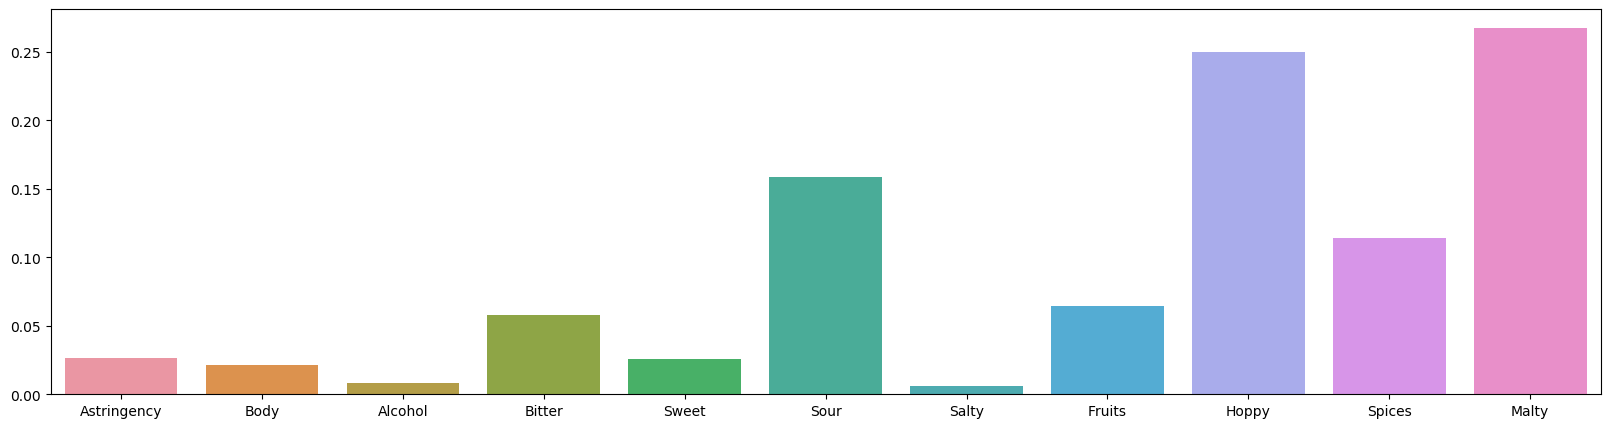

In [342]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.barplot(x =bier.columns.values[:-1] ,y = model.feature_importances_)

In [343]:
bier

,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,label
0,3.12,7.67,2.16,11.27,17.75,7.91,0.0,7.91,13.67,1.92,26.62,3
1,3.47,16.47,5.20,9.54,15.90,4.62,0.0,6.94,10.12,3.47,24.28,3
2,4.95,13.07,2.12,14.84,15.19,3.89,0.0,3.53,19.08,1.41,21.91,1
3,2.65,11.22,6.33,9.59,20.61,3.67,0.2,10.00,8.16,3.27,24.29,2
4,3.59,11.79,1.71,10.77,20.51,2.39,0.0,3.25,6.15,2.56,37.26,3
...,...,...,...,...,...,...,...,...,...,...,...,...
5348,2.06,11.34,6.19,4.90,13.40,5.41,0.0,6.70,5.41,24.74,19.85,4
5349,3.94,13.06,1.61,10.38,15.56,4.11,0.0,8.59,16.28,7.87,18.60,1
5350,1.90,6.21,8.62,12.07,12.41,10.17,0.0,13.97,18.97,3.10,12.59,1
5351,1.23,13.11,6.15,11.68,15.98,3.07,0.2,5.74,11.68,4.71,26.43,3


In [303]:
# save csv
bier.to_csv('beer_clustering.csv', sep=',', index=False, encoding='utf-8')